# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Dependancies installation
2. Load Data.
3. Define Keras Model.
4. Compile Keras Model.
5. Fit Keras Model.
6. Evaluate Keras Model.
7. Put It All Together.
8. Make Predictions

## Dependancies installation

In [75]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Installer toutes les librairies nécessaires
    !pip install tensorflow numpy pandas scikit-learn matplotlib seaborn
else:
    print("""In the environment you created for this module, install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn""")


In the environment you created for this module, install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn


## Load Data
    

In [76]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()

In [77]:
data_path='../data/'

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [78]:
import pandas as pd
df = pd.read_csv(data_path+'housepricedata.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [80]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [81]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [82]:
# Your answer here : regression ?

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [83]:
# return the numpy representation
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [84]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [85]:
# splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [86]:
# splitting into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)


Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [87]:
# scaling
from sklearn.preprocessing import StandardScaler

#datas=[X_train,X_test,X_val]

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)
X_val   = scaler.fit_transform(X_val)



## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
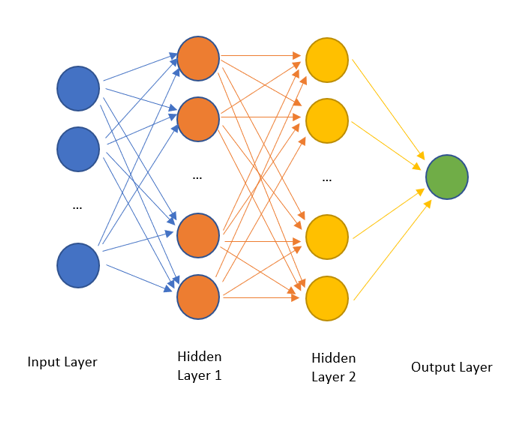  
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

<hr>

- https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
- Dense param
    - https://www.tensorflow.org/api_docs/python/tf/keras/Regularizer


In [88]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

### model description

In [89]:
# define model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(16, input_dim=12, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid')) #activation='linear'


c:\Users\HP\anaconda3\envs\ML4\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

### Compile model

In [90]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(loss='mean_squared_error', optimizer=opt)

### get model information

In [91]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357 (1.39 KB)

 Trainable params: 357 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

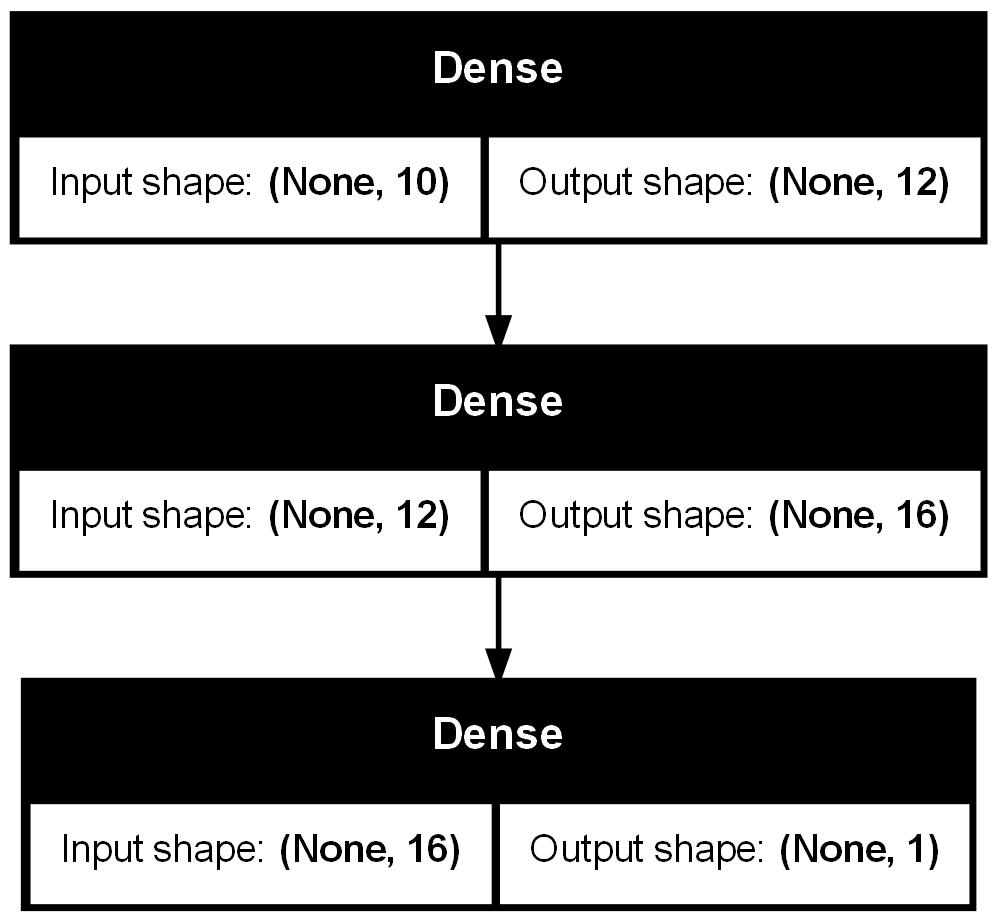

In [92]:
keras.utils.plot_model(model, "../draw/2DenseLayer.png", show_shapes=True)

### Execute model

#### todo - ask dif / batch vs iterations

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

#### fit model on train

In [93]:
# train model

# fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

# # evaluate the model
mse_train = model.evaluate(X_train, y_train, verbose=1)




Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4879 - loss: 0.2618 - val_accuracy: 0.6164 - val_loss: 0.2374
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4968 - loss: 0.2506 - val_accuracy: 0.6370 - val_loss: 0.2255
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 0.2362 - val_accuracy: 0.6644 - val_loss: 0.2152
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.2238 - val_accuracy: 0.7329 - val_loss: 0.2060
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.2170 - val_accuracy: 0.7877 - val_loss: 0.1976
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.2105 - val_accuracy: 0.8014 - val_loss: 0.1898
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.2006 - val_accuracy: 0.7945 - val_loss: 0.1823
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.1914 - val_accuracy: 0.8151 - 

In [94]:
# # fit model
# history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# # evaluate the model
# train_mse = model.evaluate(trainX, trainy, verbose=0)
# test_mse = model.evaluate(testX, testy, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

#### Evaluate model with val

In [95]:
# predict on validation set
mse_val = model.evaluate(X_val, y_val, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9201 - loss: 0.0511


In [96]:
print(f'Train: {mse_train}, Val: {mse_val}' )

Train: [0.0727076604962349, 0.8964040875434875], Val: [0.055788855999708176, 0.9178082346916199]


##### accuracy on validation set

In [103]:
# calculate accuracy on validation set



#### Use val data for ??? TODO ???

We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [98]:
# train model


#### Predict on Test

In [99]:
# predict on TEST set


# calculate accuracy on test set


### Visualize

Visualize training and validation losses and accuracies plots with the help of keras

In [100]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Accuracy

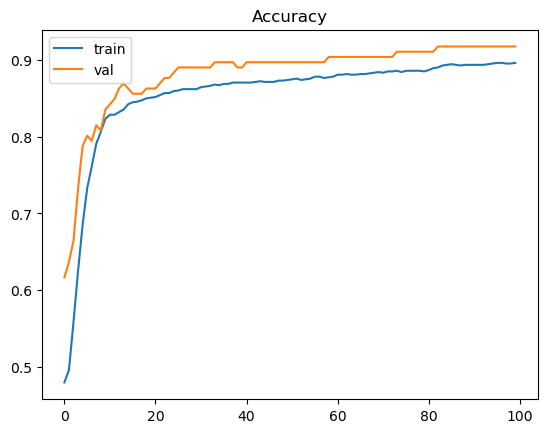

In [104]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

#### Loss / MSE

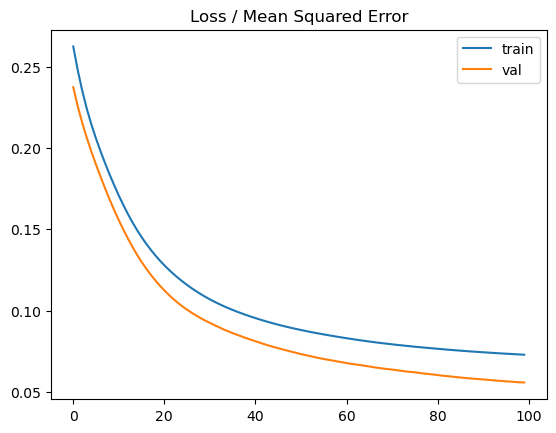

In [102]:
# visualize training and validation losses
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/